# S2 - Functions, Conditional Statements, `for`  and `while` Loops 

---
## 1. Functions and `math` Module

> Definition of a function needs to contain:
> - The keyword `def`
>- The function name
>- The parentheses 
>- The arguments if any
>- The colon
>- The content of the function with indentations
>
>Calling a function requires:
>- The function name
>- The parentheses
>- The arguments if any
>
> **Example**:
>
> **`def`** `square(x):
    y = x ** 2    
    return y`
>  
>The `math` module provides access to several mathematical functions as permutation (`math.perm()`), square root >(`math.sqrt()`), rounding  up and down (`math.ceil()` and `math.floor()`).  You can look at [this page](https://docs.python.org/3/library/math.html) for more information about functions in the `math` module. 

### Example 1.1: EOQ
Using the annual demand $D$, the holding cost per unit $H$ and fixed ordering cost $S$, define a function which calculates the economic order quantity (EOQ).

<div class="alert alert-block alert-info">  

$$ EOQ=\sqrt{\frac{2DS}{H}}$$

Next, call this function to compute the EOQ assuming $D=500$ units per year, $S=\$15$ per order, and $H=\$1.2$ per unit held in inventory. 

In [1]:
# defining the EOQ function
def EOQ(demand, order_cost, holding_cost):
    """
    Compute the economic quantity to order in order to minimize the total costs
    Parameters:
        demand: (number) annual demand
        order_cost: (number) unit ordering cost
        holding_cost: (number different than 0) unit inventory cost
    Return:
        (number) optimal quantity to order
    """
    return ((2 * demand * order_cost) / holding_cost) ** (1/2)

# calling the EOQ function
eoq_value = EOQ(600, 15, 1.2)   

# an alternative and more informative way to call the function
eoq_value=EOQ(demand=600, order_cost=15, holding_cost=1.2)


print('EOQ = ', eoq_value)

EOQ =  122.47448713915891


### Example 1.2: Rounded EOQ
Define a function which gives the EOQ as integer quantity. Use the functions within  `math` module in Python.

In [2]:
import math   # importing math module

def Round_EOQ(demand, order_cost, holding_cost):
    """
    Compute the economic quantity to order as an integer amount
    Parameters:
        demand: (number) annual demand
        order_cost: (number) unit ordering cost
        holding_cost: (number different than 0) unit inventory cost
    Return:
        (integer number) optimal quantity to order
    """
    return  math.ceil(math.sqrt((2 * demand * order_cost) / holding_cost))

# calling the Round_EOQ function
int_eoq=Round_EOQ(demand=600, order_cost=15, holding_cost=1.2)


print('Integer EOQ  = ', int_eoq, ',', type(int_eoq))

Integer EOQ  =  123 , <class 'int'>


---
## 2. Conditional Statements

> Conditional expressions are tools for modeling the behavior of a program. The element tested is called a Boolean expression, that is, it can take a true value (`True`) or a false value (`False`). In this expression, several elements can be tested using comparison operations (`==`,`!=`,`>`, `<`,`>=`, `<=`) and Boolean operations (`and`, `or`, `not`). You can look at [this page](https://www.w3schools.com/python/python_conditions.asp) for more information.

### Example 2.1: EOQ with discounts
EOQ generally minimizes the total inventory cost and ordering cost. However, EOQ may not be optimal when discounts are factored into the calculation. To calculate the EOQ when discounts are involved, we need to perform the following steps:

1. For each discount, calculate the quantity to order Q* using the EOQ equation;
2. If Q* does not qualify for a discount, choose the smallest possible order size to get the discount;
3. Calculate the total cost for each Q* or adjusted value from step 2;
4. Select the Q* that gives the lowest total cost. 

<div class="alert alert-block alert-info">  
$$TC=PD + S\left(\frac{D}{Q}\right) + H\left(\frac{Q}{2}\right)$$

- $TC$: total annual cost;
- $P$: purchase cost per unit;
- $D$: annual demand;
- $S$: fixed cost per order;
- $Q$:  order quantity;
- $H$: unit inventory holding cost.

Determine the <u>best order quantity</u> given the following situation. Demand is forecast as $4.850$ units per year, the purchase cost is $\$31$ per unit, the inventory holding cost is $\%5$ of the purchase price and the ordering cost is $\$28$. The supplier  is now offering $5\%$ discount on orders above $500$ units.

In [3]:
# defining a function to compute the total costs
def total_cost(demand, acq_cost, order_cost, holding_cost, order_qty):
    """
    Compute the total costs as the sum of the total adquisition costs, ordering costs and inventory costs.
    Parameters:
        demand: (number) annual demand,
        acq_cost: (number) unit acquisition/purchase cost,
        order_cost: (number) fixed ordering cost,
        holding_cost: (number) unit inventory holding cost,
        order_qty: (number) quantity to order.
    Return:
        (number) total costs
    """
    return (acq_cost * demand) + order_cost * (demand / order_qty) + holding_cost * (order_qty/2)


# determining EOQ and total costs without discounts (discount 0%)
eoq_no_disc = EOQ(demand=4850, order_cost=28, holding_cost=(0.05 * 31))
cost_no_disc = total_cost(demand=4850, acq_cost=31, order_cost=28, holding_cost=0.05 * 31, order_qty= eoq_no_disc)

# calculating the EOQ  for discount 5%
eoq_disc = EOQ(demand=4850, order_cost=28, holding_cost=(0.05 * 0.95 * 31))

if eoq_disc >= 500: # checking if 'eoq_disc' qualifies for the 5% discount (Q is the qty to order in this case)
    Q = eoq_disc
else:
    Q = 500  # consider the smallest possible order size to get the 5% discount
# computing the total costs with discount 5%
cost_disc = total_cost(demand=4850, acq_cost=(0.95 * 31), order_cost=28,
                       holding_cost=(0.05 * 0.95 * 31), order_qty= Q)

# choosing the most economical option
if cost_disc < cost_no_disc:   
    best_order_qty = Q
    best_total_cost = cost_disc
else:
    best_order_qty = eoq_no_disc
    best_total_cost = cost_no_disc

        
print('The best order quantity = ', best_order_qty, '; and the corresponding total costs = ', best_total_cost)   

The best order quantity =  500 ; and the corresponding total costs =  143472.225


---
## 3. Recursive Functions



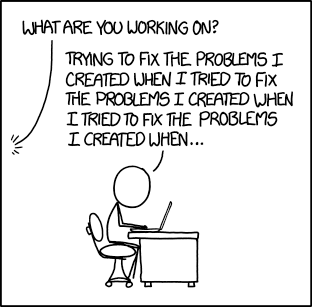
<div align="center"> Font: https://xkcd.com/1739/ </div>

### Example 3.1: Forecast using recursive functions
Using an initial demand forecast, a smoothing factor (between 0 and 1), and assuming constant demand, create a function which uses the simple exponential smoothing method to calculate the forecast demand after multiple time periods.

(Note: this is not a practically relevant problem, but it provides a context for practicing recursive functions)

<div class="alert alert-block alert-info">  
 
**Demand forecast using the exponential smoothing method:**
$$ F_{t+1}=\alpha D + (1-\alpha) F_t $$
   
    
Where:
- $F_t$ = forecast for period $t$,
    
- $D_t$ = actual demand for the period $t$,
    
- $\alpha$ = choice of smoothing constant.
    

Next, call this function to compute the forecast demand for 5 periods in the future ($F_{t+5}$), assuming an initial forecast $F_t=1000$ units, constant demand $D=1200$ units, and smoothing constant $\alpha=0.3$.

In [4]:
def forecast(initial_forecast, demand, alpha, n_periods):
    """
    Compute the forecast demand using the simple exponential smothing methood
    Parameters:
        initial_forecast: (number)  initial demand forecast
        demand: (number) demand
        alpha: (number between 0 and 1) smoothing parameter
        n_periods: (integer number) number of periods in the future for forecasting
    Return:
        (number) forcast demand after n_period
    """
    # base case forecast = initial_forecast
    if n_periods == 0:
        return initial_forecast
    else:
        return alpha * demand + (1-alpha) * forecast(initial_forecast, demand, alpha, n_periods-1)

# calling 'forecast' to determine     
print('The forecast demand for 5 periods in the future is: ', 
      forecast(initial_forecast=1000, demand=1120, alpha=0.3, n_periods=5))

The forecast demand for 5 periods in the future is:  1099.8315999999998


---
## 4. `for` and `while` Loops
### Example 4.1: Forecast using `for` loop
Using the `forecast` function created above and a `for` loop, compute the forecast demand for the next period ($F_{t+1}$) by considering different smoothing constants ($\alpha=0.1, 0.2, 0.3, 0.4, 0.5$). Assume an initial forecast $F_t=1000$ units and demand $D_t=1120$ units.

In [5]:
# computing demand forecast using exponential smoothing with different alpha values (smoothing constant)
for a in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print('Forecast for the next period considering alpha = %f is = %f'
          %(a,     forecast(initial_forecast=1000, demand=1120, alpha=a, n_periods=1)))

Forecast for the next period considering alpha = 0.100000 is = 1012.000000
Forecast for the next period considering alpha = 0.200000 is = 1024.000000
Forecast for the next period considering alpha = 0.300000 is = 1036.000000
Forecast for the next period considering alpha = 0.400000 is = 1048.000000
Forecast for the next period considering alpha = 0.500000 is = 1060.000000


### Example 4.2: Forecast using `while` loop
Repeat Exercise 4.1 using a `while` loop.

In [6]:
alpha = 0.1   # initializing the alpha value
while alpha <= 0.5:
    print('Forecast for the next period considering alpha = %f is = %f'
          %(alpha,     forecast(initial_forecast=1000, demand=1120, alpha=alpha, n_periods=1)))
    alpha += 0.1    # increasing the value of alpha by 0.1

Forecast for the next period considering alpha = 0.100000 is = 1012.000000
Forecast for the next period considering alpha = 0.200000 is = 1024.000000
Forecast for the next period considering alpha = 0.300000 is = 1036.000000
Forecast for the next period considering alpha = 0.400000 is = 1048.000000
Forecast for the next period considering alpha = 0.500000 is = 1060.000000
